# Erdos-Renyi Graphs

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [3]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')

Downloaded utils.py


In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

from utils import decorate, savefig

# Set the random seed so the notebook 
# produces the same results every time.
np.random.seed(17)

In [ ]:
# make a directory for figures
!mkdir -p figs

In [5]:
# node colors for drawing networks
colors = sns.color_palette('pastel', 5)
#sns.palplot(colors)
sns.set_palette(colors)

## Directed graph

The first example is a directed graph that represents a social network with three nodes.

In [13]:
G = nx.DiGraph()
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Cate')
list(G.nodes())

['Alice', 'Bob', 'Cate']

Here's how we add edges between nodes.

In [14]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Cate')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Cate')
list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Cate'), ('Bob', 'Alice'), ('Bob', 'Cate')]

And here's how to draw the graph.

Saving figure to file figs/chap02-1


FileNotFoundError: [Errno 2] No such file or directory: 'figs/chap02-1.png'

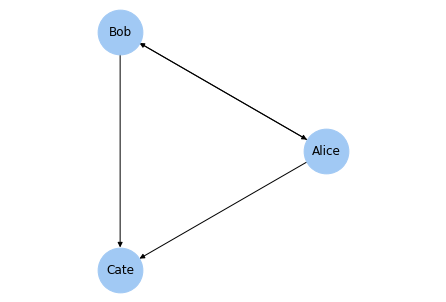

In [15]:
nx.draw_circular(G,
                 node_color='C0',
                 node_size=2000, 
                 with_labels=True)
plt.axis('equal')
savefig('figs/chap02-1')

**Exercise:**  Add another node and a few more edges and draw the graph again.

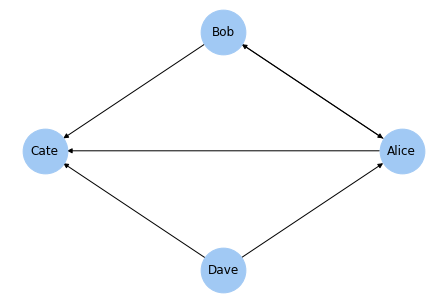

In [16]:
# Solution

G.add_edge('Dave', 'Alice')
G.add_edge('Dave', 'Cate')
nx.draw_circular(G,
                 node_color='C0',
                 node_size=2000, 
                 with_labels=True)

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`positions` is a dictionary that maps from each city to its coordinates.

In [17]:
positions = dict(Albany=(-74, 43),
                 Boston=(-71, 42),
                 NYC=(-74, 41),
                 Philly=(-75, 40))

positions['Albany']

(-74, 43)

We can use the keys in `pos` to add nodes to the graph.

In [18]:
G = nx.Graph()
G.add_nodes_from(positions)
G.nodes()

NodeView(('Albany', 'Boston', 'NYC', 'Philly'))

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [19]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from `drive_times` to add edges to the graph.

In [20]:
G.add_edges_from(drive_times)
G.edges()

EdgeView([('Albany', 'Boston'), ('Albany', 'NYC'), ('Boston', 'NYC'), ('NYC', 'Philly')])

Now we can draw the graph using `positions` to indicate the positions of the nodes, and `drive_times` to label the edges.

In [ ]:
nx.draw(G, positions, 
        node_color='C1', 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, positions, 
                             edge_labels=drive_times)

plt.axis('equal')
savefig('figs/chap02-2')

**Exercise:**  Add another city and at least one edge.

(-76.525, -70.475, 39.685, 43.315)

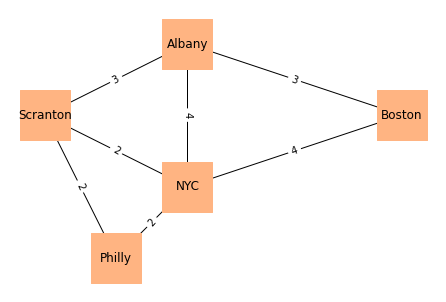

In [21]:
# Solution

positions['Scranton'] = (-76, 42)
G.add_node('Scranton')

drive_times.update({('Scranton', 'Albany'): 3,
                    ('Scranton', 'NYC'): 2,
                    ('Scranton', 'Philly'): 2})

G.add_edges_from(drive_times)

nx.draw(G, positions, 
        node_color='C1', 
        node_shape='s', 
        node_size=2500, 
        with_labels=True)

nx.draw_networkx_edge_labels(G, positions, 
                             edge_labels=drive_times)

plt.axis('equal')

## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [22]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between all pairs of nodes.

In [23]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

In [24]:
complete = make_complete_graph(10)
complete.number_of_nodes()

10

And here's what it looks like.

In [ ]:
nx.draw_circular(complete, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)
savefig('figs/chap02-3')

The `neighbors` method the neighbors for a given node.

In [ ]:
list(complete.neighbors(0))

**Exercise:** Make and draw complete directed graph with 5 nodes.

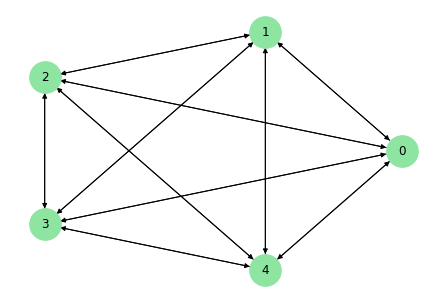

In [25]:
# Solution

def all_directed_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i != j:
                yield u, v
                
def make_complete_digraph(n):
    G = nx.DiGraph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_directed_pairs(nodes))
    return G

complete_digraph = make_complete_digraph(5)

nx.draw_circular(complete_digraph, 
                 node_color='C2', 
                 node_size=1000, 
                 with_labels=True)

## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [26]:
def flip(p):
    return np.random.random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p` 

In [27]:
def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [28]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [29]:
np.random.seed(10)

random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

12

And here's what it looks like:

In [ ]:
nx.draw_circular(random_graph, 
                 node_color='C3', 
                 node_size=1000, 
                 with_labels=True)
savefig('figs/chap02-4')

## Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [30]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

In the complete graph, starting from node 0, we can reach all nodes:

In [31]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [32]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We can use `reachable_nodes` to check whether a graph is connected:

In [33]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [34]:
is_connected(complete)

True

But if we generate a random graph with a low value of `p`, it's not:

In [35]:
random_graph = make_random_graph(10, 0.1)
len(random_graph.edges())

6

In [36]:
is_connected(random_graph)

False

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

In [37]:
# Solution

"""According to [Wolfram MathWorld](http://mathworld.wolfram.com/ConnectedDigraph.html)

"There are two distinct notions of connectivity in a directed graph. A directed graph is 
weakly connected if there is an undirected path between any pair of vertices, 
and strongly connected if there is a directed path between every pair of vertices"

We'll check for strong connectedness.

"""

def directed_reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.successors(node))
    return seen

def digraph_is_connected(G):
    for start in G:
        reachable = directed_reachable_nodes(G, start)
        if len(reachable) < len(G):
            return False
    return True
        
complete_digraph = make_complete_digraph(5)
digraph_is_connected(complete_digraph)

True

## Probability of connectivity

Now let's estimare the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [38]:
# version with a for loop

def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

In [39]:
# version with a list comprehension

def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p))
          for i in range(iters)]
    return np.mean(tf)

With `n=10` and `p=0.23`, the probability of being connected is about 33%.

In [40]:
np.random.seed(17)

n = 10
prob_connected(n, 0.23, iters=10000)

0.3393

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23. 

In [41]:
pstar = np.log(n) / n
pstar

0.23025850929940458

So let's plot the probability of connectivity for a range of values for `p`

In [42]:
ps = np.logspace(-1.3, 0, 11)
ps

array([0.05011872, 0.0676083 , 0.09120108, 0.12302688, 0.16595869,
       0.22387211, 0.30199517, 0.40738028, 0.54954087, 0.74131024,
       1.        ])

I'll estimate the probabilities with `iters=1000`

In [43]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.05011872336272722 0.0
0.06760829753919818 0.0
0.09120108393559097 0.004
0.12302687708123815 0.016
0.16595869074375605 0.109
0.22387211385683395 0.346
0.3019951720402016 0.664
0.40738027780411273 0.899
0.5495408738576245 0.989
0.7413102413009173 1.0
1.0 1.0


And then plot them, adding a vertical line at the computed critical value

Saving figure to file figs/chap02-5


FileNotFoundError: [Errno 2] No such file or directory: 'figs/chap02-5.png'

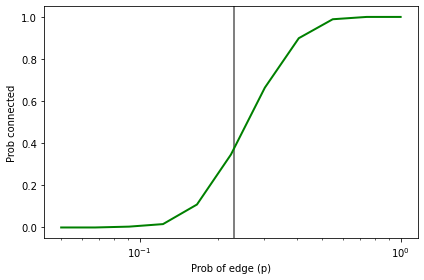

In [44]:
plt.axvline(pstar, color='gray')
plt.plot(ps, ys, color='green')
decorate(xlabel='Prob of edge (p)',
                 ylabel='Prob connected',
                 xscale='log')

savefig('figs/chap02-5')

We can run the same analysis for a few more values of `n`.

In [ ]:
ns = [300, 100, 30]
ps = np.logspace(-2.5, 0, 11)

sns.set_palette('Blues_r', 4)
for n in ns:
    print(n)
    pstar = np.log(n) / n
    plt.axvline(pstar, color='gray', alpha=0.3)

    ys = [prob_connected(n, p) for p in ps]
    plt.plot(ps, ys, label='n=%d' % n)

decorate(xlabel='Prob of edge (p)',
         ylabel='Prob connected',
         xscale='log', 
         xlim=[ps[0], ps[-1]],
         loc='upper left')

savefig('figs/chap02-6')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

**Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = list(G)[0]
        reachable = reachable_nodes(G, start)
        return len(reachable) == len(G)

In [1]:
# Solution

"""Creating an iterator and getting the first element are constant time operations.
Calling `reachable_nodes` is $O(n+m)$.  Getting the length of a set and a graph are 
constant time (but even if they were linear in $n$, it wouldn't matter).  So the 
total for `is_connected` is $O(n+m)$.""";

**Exercise:** In my implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding *all* neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  Does this "optimization" change the order of growth?  Does it make the function faster?

In [45]:
def reachable_nodes_precheck(G, start):
    # FILL THIS IN
    return []

In [ ]:
# Solution

"""Checking the nodes before putting them on the stack does not affect the order 
of growth; we have to perform the same number of checks either way.  But it might 
be a little faster because it avoids the overhead of adding and removing nodes 
from the stack over and over."""

def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            neighbors = set(G[node]) - seen
            stack.extend(neighbors)
    return seen

complete = make_complete_graph(100)

In [ ]:
%timeit len(reachable_nodes(complete, 0))

In [ ]:
%timeit len(reachable_nodes_precheck(complete, 0))

**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`.

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

1.0444444444444445
1.0454545454545454
1.0465116279069768
1.0476190476190477
1.048780487804878
1.05
1.0512820512820513
1.0526315789473684
1.054054054054054
1.0555555555555556
1.0571428571428572
1.0588235294117647
1.0606060606060606
1.0625
1.064516129032258
1.0666666666666667
1.0689655172413792
1.0714285714285714
1.0740740740740742
1.0769230769230769
1.08
1.0833333333333333
1.0869565217391304
1.0909090909090908
1.0952380952380953
1.1
1.105263157894737
1.1111111111111112
1.1176470588235294
1.125
1.1333333333333333
1.1428571428571428
1.1538461538461537
1.1666666666666667
1.1818181818181819
1.2
1.2222222222222223
1.25
1.2857142857142858
1.3333333333333333
1.4
1.5
1.6666666666666667
2.0
3.0


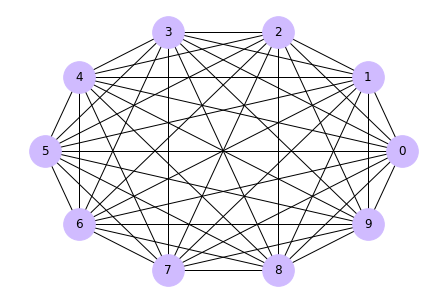

In [8]:
# Solution

colors = sns.color_palette('pastel', 5)
sns.set_palette(colors)

import random

def m_pairs(nodes, m):
    pairs = list(all_pairs(nodes))
    return random.sample(pairs, m)

def all_edges(nodes):
    for u in nodes:
        for v in nodes:
            if u < v:
                yield u, v

def m_pairs(nodes, m):
    n = len(nodes)
    num = m
    den = n * (n-1) / 2 
    for edge in all_edges(nodes):
        p = num / den
        print(p)
        if flip(p):
            num -= 1
            den -= 1
            yield edge
        else:
            den -= 1

def make_m_graph(n, m):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(m_pairs(nodes, m))
    return G

m_graph = make_m_graph(10, 47)

nx.draw_circular(m_graph, 
                 node_color='C4', 
                 node_size=1000, 
                 with_labels=True)

In [9]:
m_graph.number_of_edges()

45

In [46]:
# Solution

def prob_m_connected(n, m, iters=100):
    count = 0
    for i in range(iters):
        m_graph = make_m_graph(n, m)
        if is_connected(m_graph):
            count += 1
    return count/iters

n = 10
pstar = np.log(n) / n
ps = np.logspace(-1.3, 0, 11)
ms = [int(p * n * (n-1) / 2) for p in ps]
ys = [prob_m_connected(n, m, 100) for m in ms]

for p, m, y in zip(ps, ms, ys):
    print(p, m, y)

0.044444444444444446
0.045454545454545456
0.046511627906976744
0.047619047619047616
0.04878048780487805
0.05
0.05128205128205128
0.05263157894736842
0.05405405405405406
0.05555555555555555
0.05714285714285714
0.058823529411764705
0.06060606060606061
0.0625
0.03225806451612903
0.03333333333333333
0.034482758620689655
0.03571428571428571
0.037037037037037035
0.038461538461538464
0.04
0.041666666666666664
0.043478260869565216
0.045454545454545456
0.047619047619047616
0.05
0.05263157894736842
0.05555555555555555
0.058823529411764705
0.0625
0.06666666666666667
0.07142857142857142
0.07692307692307693
0.08333333333333333
0.09090909090909091
0.1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.044444444444444446
0.045454545454545456
0.046511627906976744
0.047619047619047616
0.04878048780487805
0.05
0.05128205128205128
0.05263157894736842
0.05405405405405406
0.05555555555555555
0.05714285714285714
0.058823529411764705
0.06060606060606061
0.0625
0.06451612903225806
0.06666666666666667
0.034482758620689655


0.0625
0.06451612903225806
0.06666666666666667
0.06896551724137931
0.07142857142857142
0.07407407407407407
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.09523809523809523
0.1
0.10526315789473684
0.1111111111111111
0.058823529411764705
0.0625
0.06666666666666667
0.07142857142857142
0.07692307692307693
0.08333333333333333
0.09090909090909091
0.1
0.1111111111111111
0.125
0.14285714285714285
0.16666666666666666
0.2
0.25
0.3333333333333333
0.5
1.0
0.044444444444444446
0.045454545454545456
0.046511627906976744
0.047619047619047616
0.04878048780487805
0.05
0.05128205128205128
0.05263157894736842
0.05405405405405406
0.05555555555555555
0.05714285714285714
0.058823529411764705
0.06060606060606061
0.0625
0.06451612903225806
0.06666666666666667
0.06896551724137931
0.07142857142857142
0.07407407407407407
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.09523809523809523
0.1
0.10526315789473684
0.1111111111111111
0.11764

0.05555555555555555
0.058823529411764705
0.0625
0.06666666666666667
0.07142857142857142
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.044444444444444446
0.022727272727272728
0.023255813953488372
0.023809523809523808
0.024390243902439025
0.025
0.02564102564102564
0.02631578947368421
0.02702702702702703
0.027777777777777776
0.02857142857142857
0.029411764705882353
0.030303030303030304
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.044444444444444446
0.045454545454545456
0.046511627906976744
0.047619047619047616
0.04878048780487805
0.05
0.05128205128205128
0.05263157894736842
0.05405405405405406
0.05555555555555555
0.05714285714285714
0.058823529411764705
0.06060606060606061
0.0625
0.06451612903225806
0.06666666666666667
0.06896551724137931
0.07142857142857142
0.07407407407407407
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.09523809523809523
0.1
0.1052631578

0.3333333333333333
0.5
0.0
0.06666666666666667
0.06818181818181818
0.06976744186046512
0.07142857142857142
0.07317073170731707
0.075
0.07692307692307693
0.07894736842105263
0.08108108108108109
0.08333333333333333
0.08571428571428572
0.08823529411764706
0.09090909090909091
0.09375
0.06451612903225806
0.06666666666666667
0.06896551724137931
0.07142857142857142
0.07407407407407407
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.09523809523809523
0.05
0.05263157894736842
0.05555555555555555
0.058823529411764705
0.0625
0.06666666666666667
0.07142857142857142
0.07692307692307693
0.08333333333333333
0.09090909090909091
0.1
0.1111111111111111
0.125
0.14285714285714285
0.16666666666666666
0.2
0.0
0.0
0.0
0.0
0.06666666666666667
0.06818181818181818
0.06976744186046512
0.07142857142857142
0.07317073170731707
0.075
0.07692307692307693
0.07894736842105263
0.08108108108108109
0.08333333333333333
0.08571428571428572
0.08823529411764706
0.06060606060606061
0.0625

0.058823529411764705
0.06060606060606061
0.0625
0.06451612903225806
0.06666666666666667
0.06896551724137931
0.07142857142857142
0.07407407407407407
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.045454545454545456
0.047619047619047616
0.05
0.05263157894736842
0.05555555555555555
0.058823529411764705
0.0625
0.06666666666666667
0.07142857142857142
0.07692307692307693
0.08333333333333333
0.09090909090909091
0.1
0.1111111111111111
0.125
0.14285714285714285
0.16666666666666666
0.2
0.25
0.3333333333333333
0.0
0.0
0.06666666666666667
0.06818181818181818
0.06976744186046512
0.07142857142857142
0.07317073170731707
0.075
0.07692307692307693
0.07894736842105263
0.08108108108108109
0.08333333333333333
0.08571428571428572
0.08823529411764706
0.09090909090909091
0.09375
0.0967741935483871
0.1
0.06896551724137931
0.07142857142857142
0.07407407407407407
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.09523809523809523
0.1
0.10526315789473684
0

0.10526315789473684
0.1111111111111111
0.11764705882352941
0.125
0.06666666666666667
0.07142857142857142
0.07692307692307693
0.08333333333333333
0.09090909090909091
0.1
0.1111111111111111
0.125
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.06666666666666667
0.06818181818181818
0.046511627906976744
0.047619047619047616
0.04878048780487805
0.05
0.05128205128205128
0.05263157894736842
0.05405405405405406
0.05555555555555555
0.05714285714285714
0.058823529411764705
0.030303030303030304
0.03125
0.03225806451612903
0.03333333333333333
0.034482758620689655
0.03571428571428571
0.037037037037037035
0.038461538461538464
0.04
0.041666666666666664
0.043478260869565216
0.045454545454545456
0.047619047619047616
0.05
0.05263157894736842
0.05555555555555555
0.058823529411764705
0.0625
0.06666666666666667
0.07142857142857142
0.07692307692307693
0.08333333333333333
0.09090909090909091
0.1
0.1111111111111111
0.125
0.14285714285714285
0.16666666666666666
0.2
0.25
0.0
0.0
0.0
0.06666666666666667
0.06818181818181818
0.0697

0.2
0.0
0.0
0.0
0.0
0.08888888888888889
0.09090909090909091
0.09302325581395349
0.09523809523809523
0.0975609756097561
0.075
0.07692307692307693
0.07894736842105263
0.08108108108108109
0.08333333333333333
0.08571428571428572
0.058823529411764705
0.06060606060606061
0.0625
0.06451612903225806
0.06666666666666667
0.06896551724137931
0.07142857142857142
0.07407407407407407
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.047619047619047616
0.05
0.05263157894736842
0.05555555555555555
0.058823529411764705
0.0625
0.06666666666666667
0.07142857142857142
0.07692307692307693
0.08333333333333333
0.09090909090909091
0.1
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.08888888888888889
0.09090909090909091
0.09302325581395349
0.07142857142857142
0.07317073170731707
0.075
0.05128205128205128
0.05263157894736842
0.05405405405405406
0.05555555555555555
0.05714285714285714
0.058823529411764705
0.06060606060606061
0.0625
0.06451612903225806
0.06666666666666667
0.068965517241

0.11428571428571428
0.11764705882352941
0.12121212121212122
0.09375
0.0967741935483871
0.06666666666666667
0.06896551724137931
0.07142857142857142
0.07407407407407407
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.09523809523809523
0.1
0.10526315789473684
0.1111111111111111
0.11764705882352941
0.125
0.13333333333333333
0.14285714285714285
0.15384615384615385
0.08333333333333333
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.08888888888888889
0.09090909090909091
0.09302325581395349
0.09523809523809523
0.0975609756097561
0.1
0.10256410256410256
0.10526315789473684
0.10810810810810811
0.1111111111111111
0.11428571428571428
0.11764705882352941
0.12121212121212122
0.125
0.12903225806451613
0.1
0.10344827586206896
0.10714285714285714
0.1111111111111111
0.11538461538461539
0.12
0.125
0.13043478260869565
0.13636363636363635
0.14285714285714285
0.15
0.15789473684210525
0.16666666666666666
0.17647058823529413
0.1875
0.2
0.21428571428571427
0.230769230769230

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.08888888888888889
0.09090909090909091
0.09302325581395349
0.07142857142857142
0.07317073170731707
0.075
0.07692307692307693
0.07894736842105263
0.08108108108108109
0.08333333333333333
0.08571428571428572
0.08823529411764706
0.09090909090909091
0.09375
0.06451612903225806
0.06666666666666667
0.06896551724137931
0.07142857142857142
0.07407407407407407
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.09523809523809523
0.1
0.10526315789473684
0.1111111111111111
0.11764705882352941
0.125
0.13333333333333333
0.07142857142857142
0.07692307692307693
0.08333333333333333
0.09090909090909091
0.1
0.1111111111111111
0.125
0.14285714285714285
0.16666666666666666
0.2
0.0
0.0
0.0
0.0
0.08888888888888889
0.09090909090909091
0.09302325581395349
0.09523809523809523
0.0975609756097561
0.1
0.10256410256410256
0.07894736842105263
0.08108108108108109
0.08333333333333333


0.16666666666666666
0.2
0.25
0.3333333333333333
0.5
1.0
0.1111111111111111
0.09090909090909091
0.09302325581395349
0.09523809523809523
0.0975609756097561
0.1
0.10256410256410256
0.10526315789473684
0.10810810810810811
0.08333333333333333
0.08571428571428572
0.08823529411764706
0.09090909090909091
0.09375
0.0967741935483871
0.06666666666666667
0.06896551724137931
0.07142857142857142
0.07407407407407407
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.09523809523809523
0.1
0.05263157894736842
0.05555555555555555
0.058823529411764705
0.0625
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1111111111111111
0.11363636363636363
0.11627906976744186
0.11904761904761904
0.12195121951219512
0.125
0.1282051282051282
0.13157894736842105
0.13513513513513514
0.1388888888888889
0.14285714285714285
0.14705882352941177
0.15151515151515152
0.15625
0.16129032258064516
0.16666666666666666
0.1724137931034483
0.17857142857142858
0.18518518518518517
0.192307

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1111111111111111
0.11363636363636363
0.11627906976744186
0.11904761904761904
0.12195121951219512
0.1
0.10256410256410256
0.10526315789473684
0.10810810810810811
0.1111111111111111
0.11428571428571428
0.11764705882352941
0.12121212121212122
0.09375
0.0967741935483871
0.1
0.10344827586206896
0.10714285714285714
0.1111111111111111
0.11538461538461539
0.12
0.125
0.13043478260869565
0.13636363636363635
0.14285714285714285
0.15
0.10526315789473684
0.1111111111111111
0.11764705882352941
0.125
0.13333333333333333
0.14285714285714285
0.15384615384615385
0.16666666666666666
0.18181818181818182
0.2
0.1111111111111111
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1111111111111111
0.11363636363636363
0.11627906976744186
0.11904761904761904
0.12195121951219512
0.125
0.1282051282051282
0.13157894736842105
0.10810810810810811
0.1111111111111111
0.08571428571428572
0.08823529411764706
0.09090909090909091
0.09375
0.0967741935483871
0.1
0.10344827586206896
0.10714285714285714
0.11111111

0.11764705882352941
0.125
0.13333333333333333
0.14285714285714285
0.15384615384615385
0.16666666666666666
0.18181818181818182
0.2
0.2222222222222222
0.25
0.2857142857142857
0.3333333333333333
0.4
0.25
0.0
0.0
0.0
0.1111111111111111
0.11363636363636363
0.11627906976744186
0.11904761904761904
0.12195121951219512
0.125
0.1282051282051282
0.13157894736842105
0.13513513513513514
0.1388888888888889
0.11428571428571428
0.08823529411764706
0.09090909090909091
0.0625
0.06451612903225806
0.06666666666666667
0.06896551724137931
0.07142857142857142
0.07407407407407407
0.07692307692307693
0.08
0.08333333333333333
0.08695652173913043
0.09090909090909091
0.09523809523809523
0.05
0.05263157894736842
0.05555555555555555
0.058823529411764705
0.0625
0.06666666666666667
0.07142857142857142
0.07692307692307693
0.08333333333333333
0.09090909090909091
0.1
0.1111111111111111
0.125
0.14285714285714285
0.16666666666666666
0.2
0.25
0.0
0.0
0.0
0.1111111111111111
0.11363636363636363
0.11627906976744186
0.11904761

0.16279069767441862
0.16666666666666666
0.17073170731707318
0.175
0.1794871794871795
0.18421052631578946
0.1891891891891892
0.16666666666666666
0.14285714285714285
0.14705882352941177
0.15151515151515152
0.15625
0.12903225806451613
0.13333333333333333
0.13793103448275862
0.14285714285714285
0.14814814814814814
0.15384615384615385
0.16
0.16666666666666666
0.17391304347826086
0.18181818181818182
0.19047619047619047
0.2
0.21052631578947367
0.16666666666666666
0.11764705882352941
0.125
0.13333333333333333
0.07142857142857142
0.07692307692307693
0.08333333333333333
0.09090909090909091
0.1
0.1111111111111111
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.15555555555555556
0.13636363636363635
0.13953488372093023
0.14285714285714285
0.14634146341463414
0.15
0.15384615384615385
0.13157894736842105
0.13513513513513514
0.1388888888888889
0.14285714285714285
0.14705882352941177
0.15151515151515152
0.15625
0.16129032258064516
0.16666666666666666
0.13793103448275862
0.14285714285714285
0.14814814814814814
0.1538

0.21428571428571427
0.23076923076923078
0.16666666666666666
0.18181818181818182
0.2
0.1111111111111111
0.125
0.14285714285714285
0.16666666666666666
0.0
0.0
0.0
0.0
0.0
0.15555555555555556
0.1590909090909091
0.16279069767441862
0.16666666666666666
0.17073170731707318
0.15
0.15384615384615385
0.15789473684210525
0.13513513513513514
0.1388888888888889
0.14285714285714285
0.14705882352941177
0.15151515151515152
0.15625
0.16129032258064516
0.16666666666666666
0.13793103448275862
0.14285714285714285
0.14814814814814814
0.15384615384615385
0.12
0.125
0.13043478260869565
0.13636363636363635
0.14285714285714285
0.15
0.15789473684210525
0.16666666666666666
0.17647058823529413
0.1875
0.2
0.21428571428571427
0.23076923076923078
0.25
0.2727272727272727
0.3
0.3333333333333333
0.375
0.42857142857142855
0.5
0.6
0.5
0.6666666666666666
1.0
1.0
0.15555555555555556
0.1590909090909091
0.13953488372093023
0.14285714285714285
0.12195121951219512
0.125
0.10256410256410256
0.10526315789473684
0.08108108108108

0.2222222222222222
0.25
0.2857142857142857
0.16666666666666666
0.2
0.25
0.0
0.0
0.0
0.2222222222222222
0.22727272727272727
0.23255813953488372
0.23809523809523808
0.24390243902439024
0.25
0.2564102564102564
0.23684210526315788
0.24324324324324326
0.25
0.2571428571428571
0.2647058823529412
0.24242424242424243
0.25
0.25806451612903225
0.26666666666666666
0.2413793103448276
0.21428571428571427
0.18518518518518517
0.19230769230769232
0.2
0.20833333333333334
0.21739130434782608
0.22727272727272727
0.23809523809523808
0.25
0.21052631578947367
0.16666666666666666
0.17647058823529413
0.1875
0.2
0.14285714285714285
0.15384615384615385
0.16666666666666666
0.18181818181818182
0.2
0.1111111111111111
0.125
0.14285714285714285
0.16666666666666666
0.0
0.0
0.0
0.0
0.0
0.2222222222222222
0.20454545454545456
0.20930232558139536
0.19047619047619047
0.1951219512195122
0.2
0.20512820512820512
0.18421052631578946
0.1891891891891892
0.19444444444444445
0.2
0.20588235294117646
0.21212121212121213
0.1875
0.193

0.23529411764705882
0.24242424242424243
0.21875
0.22580645161290322
0.23333333333333334
0.2413793103448276
0.25
0.2222222222222222
0.19230769230769232
0.2
0.16666666666666666
0.17391304347826086
0.18181818181818182
0.19047619047619047
0.15
0.10526315789473684
0.1111111111111111
0.11764705882352941
0.125
0.13333333333333333
0.14285714285714285
0.15384615384615385
0.16666666666666666
0.18181818181818182
0.1
0.1111111111111111
0.125
0.14285714285714285
0.16666666666666666
0.0
0.0
0.0
0.0
0.0
0.2222222222222222
0.22727272727272727
0.23255813953488372
0.23809523809523808
0.24390243902439024
0.25
0.2564102564102564
0.2631578947368421
0.2702702702702703
0.2777777777777778
0.2571428571428571
0.2647058823529412
0.2727272727272727
0.28125
0.25806451612903225
0.23333333333333334
0.2413793103448276
0.25
0.25925925925925924
0.2692307692307692
0.28
0.2916666666666667
0.2608695652173913
0.22727272727272727
0.23809523809523808
0.25
0.21052631578947367
0.2222222222222222
0.17647058823529413
0.1875
0.2


0.2
0.21428571428571427
0.23076923076923078
0.16666666666666666
0.18181818181818182
0.2
0.2222222222222222
0.25
0.2857142857142857
0.3333333333333333
0.4
0.5
0.3333333333333333
0.5
0.0
0.28888888888888886
0.29545454545454547
0.27906976744186046
0.2857142857142857
0.2926829268292683
0.3
0.3076923076923077
0.3157894736842105
0.32432432432432434
0.3055555555555556
0.3142857142857143
0.29411764705882354
0.30303030303030304
0.28125
0.2903225806451613
0.3
0.27586206896551724
0.2857142857142857
0.2962962962962963
0.2692307692307692
0.28
0.2916666666666667
0.30434782608695654
0.3181818181818182
0.2857142857142857
0.3
0.2631578947368421
0.2777777777777778
0.29411764705882354
0.25
0.26666666666666666
0.2857142857142857
0.23076923076923078
0.16666666666666666
0.18181818181818182
0.1
0.1111111111111111
0.125
0.14285714285714285
0.16666666666666666
0.2
0.25
0.3333333333333333
0.5
0.0
0.28888888888888886
0.2727272727272727
0.2558139534883721
0.2619047619047619
0.2682926829268293
0.275
0.282051282051

0.3
0.3076923076923077
0.2894736842105263
0.2972972972972973
0.2777777777777778
0.2571428571428571
0.2647058823529412
0.2727272727272727
0.28125
0.2903225806451613
0.3
0.3103448275862069
0.32142857142857145
0.2962962962962963
0.3076923076923077
0.28
0.2916666666666667
0.2608695652173913
0.2727272727272727
0.2857142857142857
0.25
0.2631578947368421
0.2222222222222222
0.17647058823529413
0.1875
0.2
0.21428571428571427
0.15384615384615385
0.16666666666666666
0.18181818181818182
0.2
0.2222222222222222
0.25
0.2857142857142857
0.3333333333333333
0.4
0.25
0.3333333333333333
0.0
0.0
0.28888888888888886
0.29545454545454547
0.3023255813953488
0.30952380952380953
0.2926829268292683
0.3
0.3076923076923077
0.3157894736842105
0.32432432432432434
0.3055555555555556
0.3142857142857143
0.3235294117647059
0.3333333333333333
0.3125
0.3225806451612903
0.3333333333333333
0.3103448275862069
0.32142857142857145
0.2962962962962963
0.2692307692307692
0.24
0.25
0.2608695652173913
0.2727272727272727
0.2380952380

0.5714285714285714
0.6666666666666666
0.8
0.75
1.0
1.0
1.0
0.28888888888888886
0.29545454545454547
0.27906976744186046
0.2857142857142857
0.2926829268292683
0.3
0.3076923076923077
0.3157894736842105
0.32432432432432434
0.3333333333333333
0.34285714285714286
0.35294117647058826
0.3333333333333333
0.34375
0.3225806451612903
0.3333333333333333
0.3448275862068966
0.35714285714285715
0.37037037037037035
0.38461538461538464
0.4
0.4166666666666667
0.43478260869565216
0.4090909090909091
0.42857142857142855
0.45
0.42105263157894735
0.3888888888888889
0.4117647058823529
0.4375
0.4666666666666667
0.42857142857142855
0.38461538461538464
0.4166666666666667
0.45454545454545453
0.5
0.5555555555555556
0.625
0.5714285714285714
0.5
0.6
0.5
0.3333333333333333
0.0
0.0
0.28888888888888886
0.2727272727272727
0.27906976744186046
0.2857142857142857
0.2682926829268293
0.25
0.2564102564102564
0.2631578947368421
0.2702702702702703
0.2777777777777778
0.2857142857142857
0.29411764705882354
0.30303030303030304
0.28

0.36363636363636365
0.4
0.4444444444444444
0.5
0.42857142857142855
0.3333333333333333
0.4
0.5
0.6666666666666666
1.0
1.0
0.4
0.4090909090909091
0.4186046511627907
0.42857142857142855
0.43902439024390244
0.45
0.46153846153846156
0.4473684210526316
0.4594594594594595
0.4722222222222222
0.4857142857142857
0.47058823529411764
0.48484848484848486
0.5
0.4838709677419355
0.5
0.4827586206896552
0.5
0.5185185185185185
0.5
0.52
0.5
0.4782608695652174
0.5
0.47619047619047616
0.5
0.47368421052631576
0.5
0.47058823529411764
0.5
0.4666666666666667
0.42857142857142855
0.38461538461538464
0.4166666666666667
0.45454545454545453
0.5
0.4444444444444444
0.375
0.42857142857142855
0.5
0.4
0.5
0.3333333333333333
0.5
1.0
0.4
0.38636363636363635
0.3953488372093023
0.38095238095238093
0.3902439024390244
0.4
0.41025641025641024
0.39473684210526316
0.40540540540540543
0.3888888888888889
0.37142857142857144
0.38235294117647056
0.36363636363636365
0.375
0.3870967741935484
0.36666666666666664
0.3793103448275862
0.35

0.40540540540540543
0.4166666666666667
0.4
0.4117647058823529
0.42424242424242425
0.40625
0.41935483870967744
0.43333333333333335
0.4482758620689655
0.42857142857142855
0.4444444444444444
0.4230769230769231
0.4
0.375
0.391304347826087
0.36363636363636365
0.38095238095238093
0.35
0.3684210526315789
0.3888888888888889
0.4117647058823529
0.4375
0.4666666666666667
0.42857142857142855
0.38461538461538464
0.4166666666666667
0.45454545454545453
0.4
0.4444444444444444
0.5
0.5714285714285714
0.6666666666666666
0.6
0.5
0.3333333333333333
0.0
0.0
0.4
0.4090909090909091
0.3953488372093023
0.38095238095238093
0.36585365853658536
0.375
0.358974358974359
0.3684210526315789
0.35135135135135137
0.3333333333333333
0.3142857142857143
0.3235294117647059
0.3333333333333333
0.3125
0.3225806451612903
0.3
0.3103448275862069
0.2857142857142857
0.2962962962962963
0.3076923076923077
0.28
0.2916666666666667
0.30434782608695654
0.3181818181818182
0.3333333333333333
0.35
0.3157894736842105
0.3333333333333333
0.3529

0.34375
0.3225806451612903
0.3
0.3103448275862069
0.32142857142857145
0.3333333333333333
0.34615384615384615
0.36
0.375
0.34782608695652173
0.36363636363636365
0.3333333333333333
0.35
0.3684210526315789
0.3888888888888889
0.35294117647058826
0.375
0.4
0.42857142857142855
0.46153846153846156
0.5
0.5454545454545454
0.5
0.4444444444444444
0.5
0.5714285714285714
0.6666666666666666
0.6
0.75
0.6666666666666666
0.5
1.0
0.4
0.38636363636363635
0.3953488372093023
0.38095238095238093
0.3902439024390244
0.375
0.38461538461538464
0.39473684210526316
0.3783783783783784
0.3888888888888889
0.4
0.4117647058823529
0.42424242424242425
0.40625
0.3870967741935484
0.4
0.41379310344827586
0.42857142857142855
0.4074074074074074
0.38461538461538464
0.36
0.375
0.391304347826087
0.4090909090909091
0.38095238095238093
0.4
0.3684210526315789
0.3333333333333333
0.35294117647058826
0.3125
0.3333333333333333
0.35714285714285715
0.3076923076923077
0.3333333333333333
0.36363636363636365
0.4
0.3333333333333333
0.25
0.2

0.6666666666666666
0.5
1.0
0.5333333333333333
0.5227272727272727
0.5116279069767442
0.5
0.5121951219512195
0.5
0.48717948717948717
0.47368421052631576
0.4864864864864865
0.5
0.5142857142857142
0.5
0.48484848484848486
0.46875
0.4838709677419355
0.4666666666666667
0.4827586206896552
0.4642857142857143
0.4444444444444444
0.46153846153846156
0.44
0.4583333333333333
0.4782608695652174
0.5
0.47619047619047616
0.5
0.47368421052631576
0.5
0.5294117647058824
0.5
0.5333333333333333
0.5
0.5384615384615384
0.5
0.45454545454545453
0.5
0.5555555555555556
0.5
0.5714285714285714
0.6666666666666666
0.8
0.75
0.6666666666666666
1.0
1.0
0.5333333333333333
0.5227272727272727
0.5116279069767442
0.5
0.4878048780487805
0.5
0.48717948717948717
0.5
0.4864864864864865
0.5
0.4857142857142857
0.5
0.48484848484848486
0.46875
0.4838709677419355
0.5
0.4827586206896552
0.4642857142857143
0.48148148148148145
0.46153846153846156
0.48
0.5
0.4782608695652174
0.45454545454545453
0.47619047619047616
0.5
0.47368421052631576


0.6071428571428571
0.6296296296296297
0.6153846153846154
0.6
0.5833333333333334
0.6086956521739131
0.5909090909090909
0.5714285714285714
0.55
0.5789473684210527
0.6111111111111112
0.5882352941176471
0.5625
0.6
0.5714285714285714
0.5384615384615384
0.5833333333333334
0.6363636363636364
0.6
0.6666666666666666
0.625
0.7142857142857143
0.6666666666666666
0.8
0.75
0.6666666666666666
0.5
1.0
0.5333333333333333
0.5227272727272727
0.5348837209302325
0.5238095238095238
0.5121951219512195
0.5
0.5128205128205128
0.5
0.4864864864864865
0.5
0.5142857142857142
0.5
0.48484848484848486
0.5
0.4838709677419355
0.5
0.4827586206896552
0.5
0.48148148148148145
0.5
0.52
0.5
0.5217391304347826
0.5
0.5238095238095238
0.5
0.47368421052631576
0.5
0.47058823529411764
0.4375
0.4
0.42857142857142855
0.38461538461538464
0.4166666666666667
0.45454545454545453
0.4
0.3333333333333333
0.375
0.42857142857142855
0.3333333333333333
0.2
0.25
0.0
0.0
0.0
0.5333333333333333
0.5227272727272727
0.5348837209302325
0.523809523809

0.8
0.7857142857142857
0.8461538461538461
0.8333333333333334
0.8181818181818182
0.8
0.7777777777777778
0.75
0.7142857142857143
0.6666666666666666
0.6
0.75
0.6666666666666666
0.5
0.0
0.7333333333333333
0.7272727272727273
0.7209302325581395
0.7142857142857143
0.7073170731707317
0.725
0.717948717948718
0.7105263157894737
0.7297297297297297
0.7222222222222222
0.7142857142857143
0.7352941176470589
0.7272727272727273
0.75
0.7419354838709677
0.7666666666666667
0.7586206896551724
0.75
0.7407407407407407
0.7307692307692307
0.72
0.75
0.7391304347826086
0.7727272727272727
0.7619047619047619
0.8
0.7894736842105263
0.7777777777777778
0.7647058823529411
0.75
0.7333333333333333
0.7142857142857143
0.6923076923076923
0.6666666666666666
0.6363636363636364
0.6
0.5555555555555556
0.5
0.42857142857142855
0.5
0.4
0.25
0.3333333333333333
0.5
0.0
0.7333333333333333
0.7272727272727273
0.7209302325581395
0.7142857142857143
0.7073170731707317
0.725
0.717948717948718
0.7105263157894737
0.7297297297297297
0.722222

0.717948717948718
0.7105263157894737
0.7027027027027027
0.6944444444444444
0.6857142857142857
0.6764705882352942
0.696969696969697
0.71875
0.7096774193548387
0.7
0.6896551724137931
0.6785714285714286
0.6666666666666666
0.6923076923076923
0.68
0.6666666666666666
0.6956521739130435
0.7272727272727273
0.7142857142857143
0.7
0.6842105263157895
0.7222222222222222
0.7058823529411765
0.75
0.7333333333333333
0.7857142857142857
0.7692307692307693
0.75
0.7272727272727273
0.8
0.7777777777777778
0.75
0.7142857142857143
0.6666666666666666
0.8
0.75
0.6666666666666666
1.0
1.0
0.7333333333333333
0.75
0.7441860465116279
0.7380952380952381
0.7317073170731707
0.75
0.7435897435897436
0.7368421052631579
0.7297297297297297
0.7222222222222222
0.7142857142857143
0.7352941176470589
0.7575757575757576
0.75
0.7419354838709677
0.7666666666666667
0.7931034482758621
0.7857142857142857
0.7777777777777778
0.8076923076923077
0.8
0.7916666666666666
0.8260869565217391
0.8181818181818182
0.8095238095238095
0.8
0.78947368

0.7272727272727273
0.7
0.6666666666666666
0.75
0.7142857142857143
0.6666666666666666
0.8
0.75
0.6666666666666666
0.5
1.0
0.7333333333333333
0.7272727272727273
0.7209302325581395
0.7142857142857143
0.7317073170731707
0.75
0.7435897435897436
0.7368421052631579
0.7297297297297297
0.75
0.7428571428571429
0.7352941176470589
0.7272727272727273
0.71875
0.7096774193548387
0.7
0.6896551724137931
0.6785714285714286
0.6666666666666666
0.6923076923076923
0.72
0.7083333333333334
0.7391304347826086
0.7272727272727273
0.7619047619047619
0.75
0.7368421052631579
0.7222222222222222
0.7058823529411765
0.6875
0.6666666666666666
0.6428571428571429
0.6153846153846154
0.5833333333333334
0.6363636363636364
0.6
0.5555555555555556
0.625
0.5714285714285714
0.5
0.4
0.5
0.3333333333333333
0.5
0.0
0.7333333333333333
0.7272727272727273
0.7209302325581395
0.7380952380952381
0.7317073170731707
0.725
0.7435897435897436
0.7368421052631579
0.7297297297297297
0.7222222222222222
0.7142857142857143
0.7058823529411765
0.6969

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


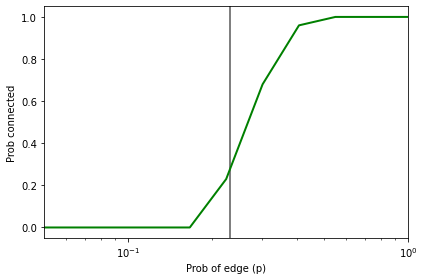

In [47]:
# Solution

plt.axvline(pstar, color='gray')
plt.plot(ps, ys, color='green')
decorate(xlabel='Prob of edge (p)',
         ylabel='Prob connected',
         xscale='log', 
         xlim=[ps[0], ps[-1]])